In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import stylized_score
import torch
import train_garch
import visualize_stylized_facts as vsf

## Set seeds for reconstruction of the results

In [2]:
# Set seeds.
SEED = 12345
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

#### Load Data

Filter out selected times and stocks

Inspect data for missing information

In [3]:
np_ret = train_garch.sample_garch(
    "/home/nico/thesis/code/data/cache/GARCH_normal_GARCH_2024_07_10-10_54_26",
    seed=SEED,
)

/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/arch/univariate/volatility.py:1154: InitialValueWarning: Parameters are not consistent with a stationary model. Using the intercept
to initialize the model.

  warn(initial_value_warning, InitialValueWarning)
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/arch/univariate/volatility.py:1154: InitialValueWarning: Parameters are not consistent with a stationary model. Using the intercept
to initialize the model.

  warn(initial_value_warning, InitialValueWarning)
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/arch/univariate/volatility.py:1154: InitialValueWarning: Parameters are not consistent with a stationary model. Using the intercept
to initialize the model.

  warn(initial_value_warning, InitialValueWarning)
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/py

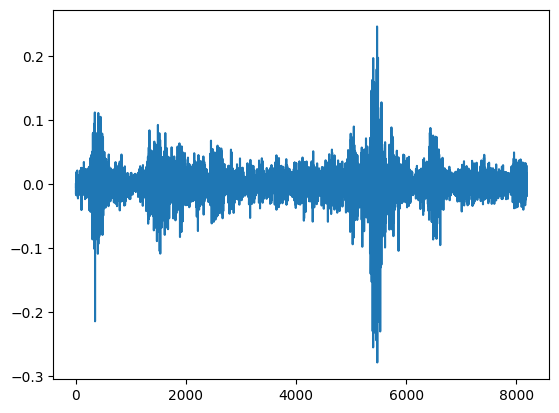

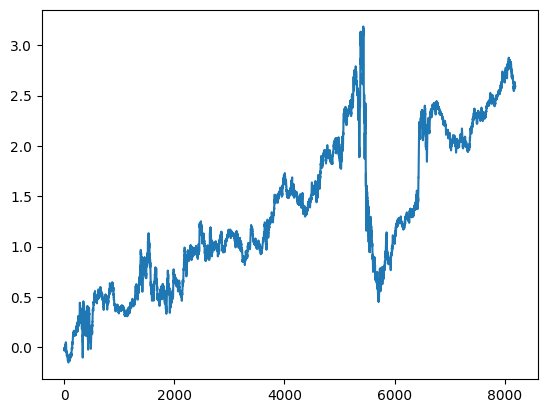

In [4]:
plt.plot(np_ret[:, 1])
plt.show()

plt.plot(np.cumsum(np_ret[:, 1]))
plt.show()

/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


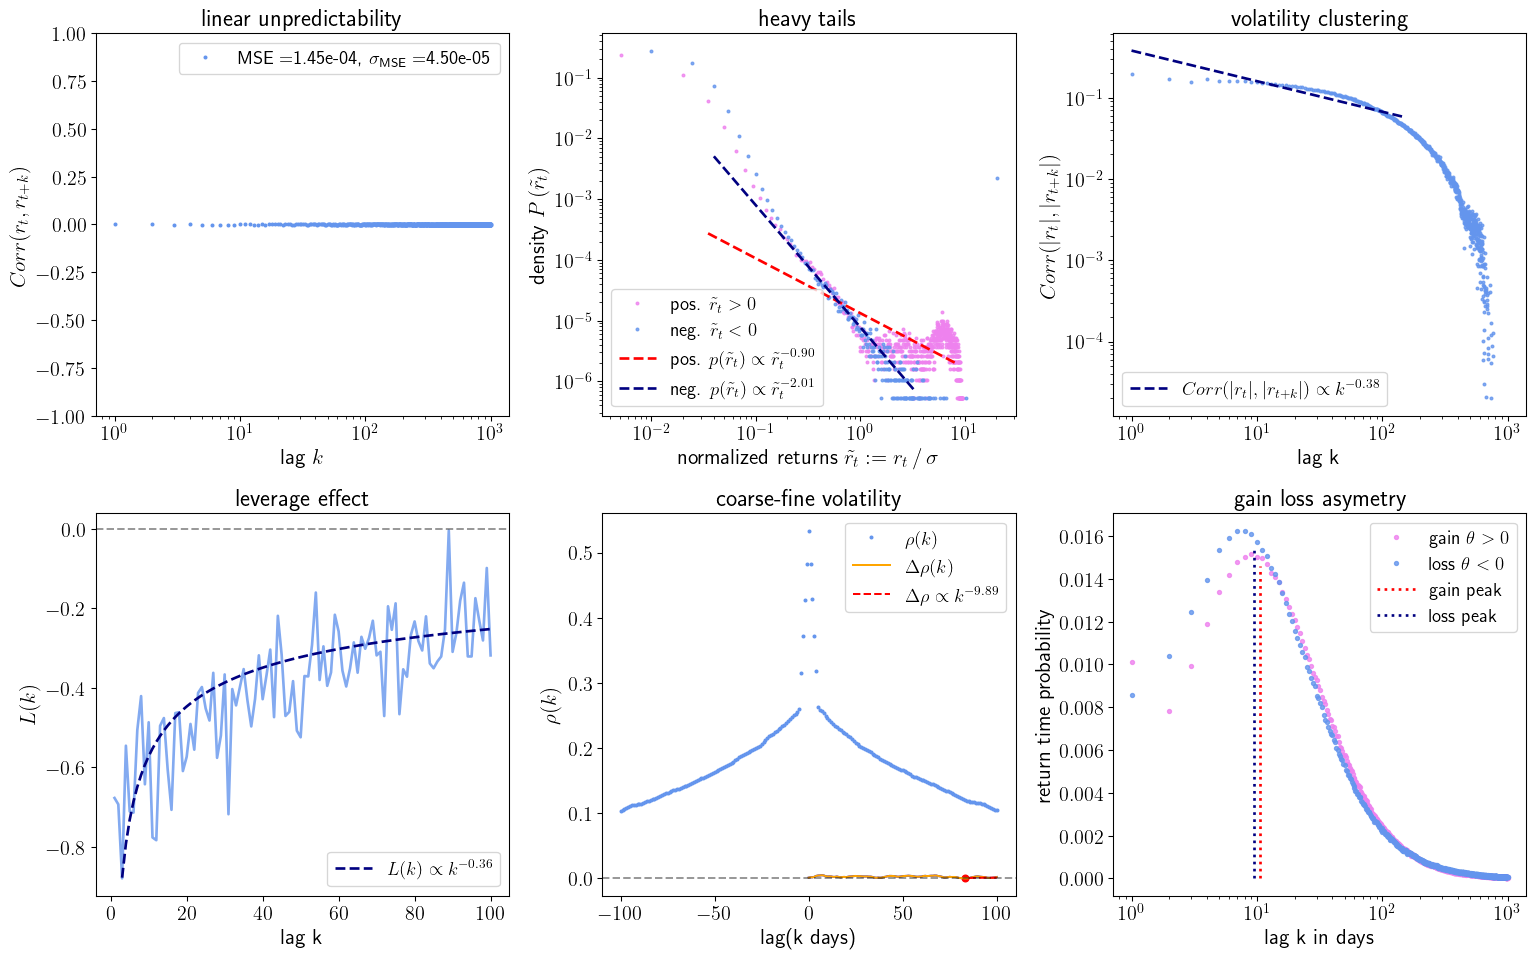

In [5]:
# fig = vsf.visualize_stylized_facts_paper(np_ret, 1.1 * 5.106)
# fig.savefig('/home/nico/thesis/thesis/figure/garch.pgf')
fig = vsf.visualize_stylized_facts(np_ret)

In [6]:
stats = stylized_score._compute_stats(np_ret, "real")

/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/nico/.cache/pypoetry/virtualenvs/synthetic-data-5lnic9a9-py3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [7]:
sel = ["beta", "beta_max", "beta_std", "beta_min", "beta_mean", "beta_median"]
cf_stats = stats["cfv_real_stat"]
{s: cf_stats[s] for s in sel}

{'beta': -9.885966589519466,
 'beta_max': 8.33697306359091,
 'beta_std': 11.155599498907906,
 'beta_min': -69.46424514273784,
 'beta_mean': -5.931296044256971,
 'beta_median': -1.592223704822157}

In [8]:
sel = ["mse", "mse_max", "mse_std", "mse_min", "mse_mean", "mse_median"]
lu_stats = stats["lu_real_stat"]
{s: lu_stats[s] for s in sel}

{'mse': 0.00014528869610533704,
 'mse_max': 0.0004908361514524095,
 'mse_std': 4.4955608852213965e-05,
 'mse_min': 0.00010991281135792964,
 'mse_mean': 0.00014528869610533706,
 'mse_median': 0.00013508739224864414}

In [9]:
sel = [
    "neg_beta",
    "neg_beta_max",
    "neg_beta_std",
    "neg_beta_min",
    "neg_beta_mean",
    "neg_beta_median",
]
ht_stats = stats["ht_real_stat"]
{s: ht_stats[s] for s in sel}

{'neg_beta': -2.0065962623311533,
 'neg_beta_max': -1.2656370945542226,
 'neg_beta_std': 0.7792716168481987,
 'neg_beta_min': -6.175082310265493,
 'neg_beta_mean': -4.460379692576769,
 'neg_beta_median': -4.571268670137052}

In [10]:
sel = [
    "pos_beta",
    "pos_beta_max",
    "pos_beta_std",
    "pos_beta_min",
    "pos_beta_mean",
    "pos_beta_median",
]
ht_stats = stats["ht_real_stat"]
{s: ht_stats[s] for s in sel}

{'pos_beta': -0.9011383628717555,
 'pos_beta_max': -2.3405604724234355,
 'pos_beta_std': 1.0211607091237713,
 'pos_beta_min': -14.943742346727205,
 'pos_beta_mean': -4.6729321222692795,
 'pos_beta_median': -4.7322440900877085}

In [11]:
sel = ["beta", "beta_max", "beta_std", "beta_min", "beta_mean", "beta_median"]
le_stats = stats["le_real_stat"]
{s: le_stats[s] for s in sel}

{'beta': -0.35557465874691724,
 'beta_max': 1.5657274042541212,
 'beta_std': 0.22854147162797436,
 'beta_min': -0.9676564415388343,
 'beta_mean': -0.09314862008966651,
 'beta_median': -0.11178391987645785}

In [12]:
sel = ["beta", "beta_max", "beta_std", "beta_min", "beta_mean", "beta_median"]
vc_stats = stats["vc_real_stat"]
{s: vc_stats[s] for s in sel}

{'beta': -0.3757720842580144,
 'beta_max': -0.020897961973677315,
 'beta_std': 0.27999838185819215,
 'beta_min': -1.2295453885075975,
 'beta_mean': -0.5233649398821105,
 'beta_median': -0.5079943720850683}

In [13]:
sel = [
    "arg_diff",
    "arg_diff_mean",
    "arg_diff_std",
    "arg_diff_max",
    "arg_diff_min",
    "arg_diff_median",
]
gl_stats = stats["gl_real_stat"]
{s: gl_stats[s] for s in sel}

{'arg_diff': 1.0,
 'arg_diff_mean': 1.946351931330472,
 'arg_diff_std': 3.6467278525619067,
 'arg_diff_max': 19.5,
 'arg_diff_min': -9.0,
 'arg_diff_median': 1.0}